# Interpolation of Cloud Atmosphere using scipy.interpolate.griddata

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

## Creating a interpolation graph for cloud in atmosphere

> Using a cloud in an atmosphere

In [247]:
df_cloud_atm = pd.read_csv("../create_atm/atmospheres/cloud_atm_1-2_final.csv", header = None, index_col = 0)

In [248]:
df_cloud_atm

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
0.125000,0.041789,0.041461,0.041488,0.041451,0.041419,0.041366,0.034079,0.033589,0.033398,0.033117,0.033077,0.032937
0.176777,0.042479,0.042024,0.042055,0.041990,0.041954,0.041877,0.034951,0.034263,0.034002,0.033588,0.033532,0.033331
0.250000,0.043450,0.042816,0.042851,0.042757,0.042704,0.042598,0.036171,0.035207,0.034841,0.034265,0.034182,0.033885
0.353553,0.044803,0.043916,0.043969,0.043830,0.043750,0.043607,0.037887,0.036536,0.036036,0.035220,0.035082,0.034664
0.500000,0.046706,0.045484,0.045528,0.045325,0.045211,0.045011,0.040304,0.038381,0.037704,0.036563,0.036349,0.035739
0.707107,0.049367,0.047695,0.047720,0.047413,0.047246,0.046957,0.043716,0.040992,0.040068,0.038477,0.038126,0.037219
1.000000,0.053126,0.050829,0.050792,0.050325,0.050095,0.049679,0.048568,0.044645,0.043419,0.041166,0.040618,0.039290
1.414214,0.058442,0.055310,0.055142,0.054417,0.054091,0.053516,0.055583,0.049818,0.048165,0.045025,0.044149,0.042162
2.000000,0.066103,0.061775,0.061409,0.060296,0.059830,0.059018,0.065739,0.057213,0.054974,0.050583,0.049219,0.046221


In [253]:
N_cloud_atm = int(df_cloud_atm.shape[1]/2)
effr_cloud = [4,8,10,16,20,32] # effr_cloud = [0.1,0.5,1,2,4,8,10,16,20,32] 

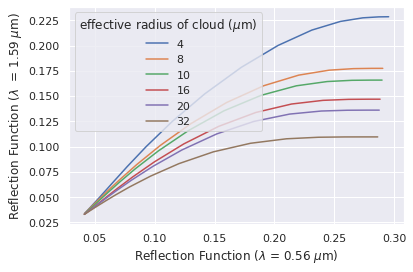

In [255]:
N_cloud_atm = int(df_cloud_atm.shape[1]/2)

for i in range(N_cloud_atm):
    plt.plot(df_cloud_atm[1+i], df_cloud_atm[i+1+N_cloud_atm])

plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.show()

Text(0.5, 1.0, '$\\mu_{0}$ = 1, $\\mu$ = sqrt(3)/2')

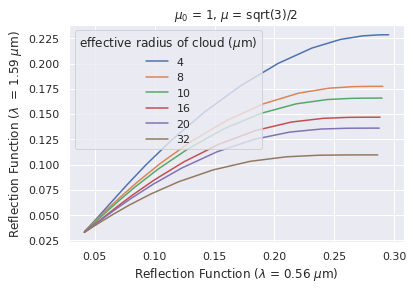

In [258]:
fig, ax = plt.subplots()

for i in range(N_cloud_atm):
    plt.plot(df_cloud_atm[i+1], df_cloud_atm[i+1+N_cloud_atm])
# plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# plt.plot(df_cloud_atm[6], df_cloud_atm[12])

plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')
plt.title('$\mu_{0}$ = 1, $\mu$ = sqrt(3)/2')

> data manipulation to plot lines of constant optical depth

In [259]:
df2_cloud_atm = df_cloud_atm.T

In [260]:
df2_cloud_atm

,0.125000,0.176777,0.250000,0.353553,0.500000,0.707107,1.000000,1.414214,2.000000,2.828427,4.000000,5.656854,8.000000,11.313708,16.000000,22.627417,32.000000,45.254834,64.000000,90.509668
1,0.041789,0.042479,0.043450,0.044803,0.046706,0.049367,0.053126,0.058442,0.066103,0.077176,0.093038,0.114704,0.141872,0.172361,0.203057,0.231207,0.255079,0.273755,0.287039,0.295284
2,0.041461,0.042024,0.042816,0.043916,0.045484,0.047695,0.050829,0.055310,0.061775,0.071296,0.085207,0.104824,0.130345,0.160107,0.191082,0.220298,0.245674,0.266008,0.280848,0.290379
3,0.041488,0.042055,0.042851,0.043969,0.045528,0.047720,0.050792,0.055142,0.061409,0.070587,0.084059,0.103182,0.128288,0.157826,0.188831,0.218262,0.243976,0.264709,0.279927,0.289784
4,0.041451,0.041990,0.042757,0.043830,0.045325,0.047413,0.050325,0.054417,0.060296,0.068930,0.081667,0.099971,0.124357,0.153498,0.184499,0.214260,0.240524,0.261894,0.277748,0.288146
5,0.041419,0.041954,0.042704,0.043750,0.045211,0.047246,0.050095,0.054091,0.059830,0.068248,0.080714,0.098722,0.122836,0.151817,0.182805,0.212682,0.239132,0.260738,0.276829,0.287431
6,0.041366,0.041877,0.042598,0.043607,0.045011,0.046957,0.049679,0.053516,0.059018,0.067103,0.079133,0.096649,0.120322,0.149035,0.179981,0.210026,0.236782,0.258763,0.275229,0.286157
7,0.034079,0.034951,0.036171,0.037887,0.040304,0.043716,0.048568,0.055583,0.065739,0.080271,0.100103,0.124890,0.152263,0.178510,0.200191,0.215367,0.223941,0.227496,0.228439,0.228571
8,0.033589,0.034263,0.035207,0.036536,0.038381,0.040992,0.044645,0.049818,0.057213,0.067738,0.082361,0.101242,0.122805,0.143689,0.160309,0.170799,0.175705,0.177220,0.177481,0.177500
9,0.033398,0.034002,0.034841,0.036036,0.037704,0.040068,0.043419,0.048165,0.054974,0.064704,0.078243,0.095800,0.115942,0.135433,0.150776,0.160214,0.164439,0.165660,0.165851,0.165864
10,0.033117,0.033588,0.034265,0.035220,0.036563,0.038477,0.041166,0.045025,0.050583,0.058609,0.069971,0.085034,0.102708,0.120095,0.133845,0.142195,0.145818,0.146815,0.146960,0.146969


In [261]:
dTau_range_cloud = []

for col in df2_cloud_atm.columns:
    dTau_range_cloud.append(col)

print(dTau_range_cloud)

[0.125, 0.1767766952966369, 0.25, 0.3535533905932738, 0.5, 0.7071067811865476, 1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.31370849898476, 16.0, 22.62741699796952, 32.0, 45.254833995939045, 64.0, 90.50966799187808]


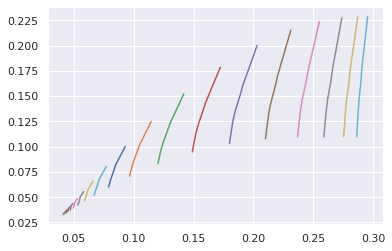

In [262]:
N_dTau_cloud = len(dTau_range_cloud)

fig, ax = plt.subplots()

for i in range(N_dTau_cloud):
    x = df2_cloud_atm[dTau_range_cloud[i]][0:N_cloud_atm]
    y = df2_cloud_atm[dTau_range_cloud[i]][N_cloud_atm:2*N_cloud_atm]
    
    plt.plot(x,y)

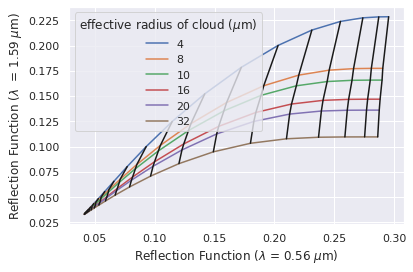

In [264]:
N_dTau_cloud = len(dTau_range_cloud)

fig, ax = plt.subplots()

for i in range(N_cloud_atm):
    plt.plot(df_cloud_atm[i+1], df_cloud_atm[i+1+N_cloud_atm])
# plt.plot(df_cloud_atm[5], df_cloud_atm[11])
# plt.plot(df_cloud_atm[6], df_cloud_atm[12])

plt.legend(effr_cloud, title='effective radius of cloud ($\mu$m)')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$  = 1.59 $\mu$m)')

for i in range(N_dTau_cloud):
    x = df2_cloud_atm[dTau_range_cloud[i]][:N_cloud_atm]
    y = df2_cloud_atm[dTau_range_cloud[i]][N_cloud_atm:2*N_cloud_atm]
    
    plt.plot(x,y, color = 'k')

## Bilinear Interpolation

In [265]:
df_index_log = np.log(df_cloud_atm.index)
df_index_log

Float64Index([-2.0794415416798357, -1.7328679513998633, -1.3862943611198906,
              -1.0397207708399179, -0.6931471805599453, -0.3465735902799726,
                              0.0,  0.3465735902799727,  0.6931471805599453,
                1.039720770839918,  1.3862943611198906,  1.7328679513998633,
               2.0794415416798357,  2.4260151319598084,   2.772588722239781,
                3.119162312519754,  3.4657359027997265,  3.8123094930796992,
               4.1588830833596715,   4.505456673639644],
             dtype='float64', name=0)

In [266]:
#df_cloud_atm.index

> figuring out where it is appropriate to do bilinear interpolation
- optical depth scaling and values

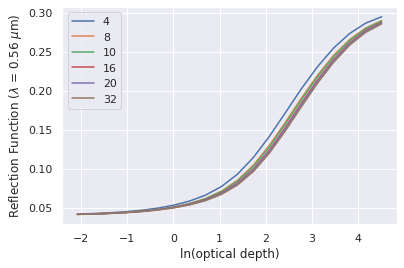

In [269]:
for i in range(N_cloud_atm):
    plt.plot(df_index_log, df_cloud_atm[i+1])
    plt.xlabel('ln(optical depth)')
    plt.ylabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
    plt.legend(effr_cloud)

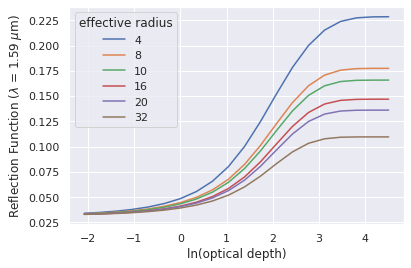

In [270]:
for i in range(N_cloud_atm):
    plt.plot(df_index_log, df_cloud_atm[i+1+N_cloud_atm])
    plt.xlabel('ln(optical depth)')
    plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
    plt.legend(effr_cloud, title = 'effective radius')

The reflectance function is vaguely linear is ln(optical depth) in the range: 2 < optical depth < 16 in both reflection function

Hence we do the bilinear interpolation between these values

- effective radius scaling (we know that the values used will be 2, 10, 20

## Interpolating using griddata routine

Text(0, 0.5, 'yi')

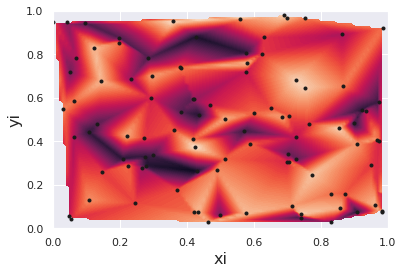

In [271]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# data coordinates and values
x = np.random.random(100)
y = np.random.random(100)
z = np.random.random(100)

# target grid to interpolate to
xi = yi = np.arange(0,1.01,0.01)
xi,yi = np.meshgrid(xi,yi)

# set mask
#mask = (xi > 0.5) & (xi < 0.6) & (yi > 0.5) & (yi < 0.6)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# mask out the field
#zi[mask] = np.nan

# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,np.arange(0,1.01,0.01))
plt.plot(x,y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
# plt.savefig('interpolated.png',dpi=100)
# plt.close(fig)

Text(0.5, 1.0, 'grid and contour (200 points, 20000 grid points)')

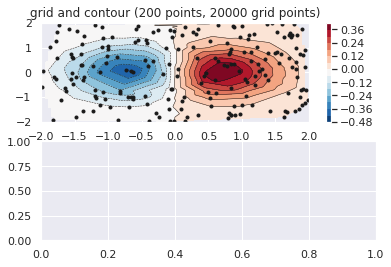

In [272]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
#from scipy.interpolate import griddata
#zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# # ----------
# # Tricontour
# # ----------
# # Directly supply the unordered, irregularly spaced coordinates
# # to tricontour.

# ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
# cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

# fig.colorbar(cntr2, ax=ax2)
# ax2.plot(x, y, 'ko', ms=3)
# ax2.set(xlim=(-2, 2), ylim=(-2, 2))
# ax2.set_title('tricontour (%d points)' % npts)

# plt.subplots_adjust(hspace=0.5)
# plt.show()

### Effective Radius interpolation

In [312]:
df2_cloud_atm

,0.125000,0.176777,0.250000,0.353553,0.500000,0.707107,1.000000,1.414214,2.000000,2.828427,4.000000,5.656854,8.000000,11.313708,16.000000,22.627417,32.000000,45.254834,64.000000,90.509668
1,0.041789,0.042479,0.043450,0.044803,0.046706,0.049367,0.053126,0.058442,0.066103,0.077176,0.093038,0.114704,0.141872,0.172361,0.203057,0.231207,0.255079,0.273755,0.287039,0.295284
2,0.041461,0.042024,0.042816,0.043916,0.045484,0.047695,0.050829,0.055310,0.061775,0.071296,0.085207,0.104824,0.130345,0.160107,0.191082,0.220298,0.245674,0.266008,0.280848,0.290379
3,0.041488,0.042055,0.042851,0.043969,0.045528,0.047720,0.050792,0.055142,0.061409,0.070587,0.084059,0.103182,0.128288,0.157826,0.188831,0.218262,0.243976,0.264709,0.279927,0.289784
4,0.041451,0.041990,0.042757,0.043830,0.045325,0.047413,0.050325,0.054417,0.060296,0.068930,0.081667,0.099971,0.124357,0.153498,0.184499,0.214260,0.240524,0.261894,0.277748,0.288146
5,0.041419,0.041954,0.042704,0.043750,0.045211,0.047246,0.050095,0.054091,0.059830,0.068248,0.080714,0.098722,0.122836,0.151817,0.182805,0.212682,0.239132,0.260738,0.276829,0.287431
6,0.041366,0.041877,0.042598,0.043607,0.045011,0.046957,0.049679,0.053516,0.059018,0.067103,0.079133,0.096649,0.120322,0.149035,0.179981,0.210026,0.236782,0.258763,0.275229,0.286157
7,0.034079,0.034951,0.036171,0.037887,0.040304,0.043716,0.048568,0.055583,0.065739,0.080271,0.100103,0.124890,0.152263,0.178510,0.200191,0.215367,0.223941,0.227496,0.228439,0.228571
8,0.033589,0.034263,0.035207,0.036536,0.038381,0.040992,0.044645,0.049818,0.057213,0.067738,0.082361,0.101242,0.122805,0.143689,0.160309,0.170799,0.175705,0.177220,0.177481,0.177500
9,0.033398,0.034002,0.034841,0.036036,0.037704,0.040068,0.043419,0.048165,0.054974,0.064704,0.078243,0.095800,0.115942,0.135433,0.150776,0.160214,0.164439,0.165660,0.165851,0.165864
10,0.033117,0.033588,0.034265,0.035220,0.036563,0.038477,0.041166,0.045025,0.050583,0.058609,0.069971,0.085034,0.102708,0.120095,0.133845,0.142195,0.145818,0.146815,0.146960,0.146969


In [313]:
df2_numpy = df2_cloud_atm.to_numpy()

In [314]:
df2_numpy[0]

array([0.0417894 , 0.04247922, 0.04344953, 0.04480296, 0.0467061 ,
       0.04936737, 0.05312594, 0.05844226, 0.06610311, 0.07717578,
       0.09303763, 0.11470351, 0.1418717 , 0.17236081, 0.20305729,
       0.23120713, 0.25507855, 0.27375525, 0.28703895, 0.29528418])

In [315]:
x = df2_numpy[0]
for i in range(N_cloud_atm-1):
    x = np.concatenate([x, df2_numpy[i+1]])

y = df2_numpy[N_cloud_atm]
for i in range(N_cloud_atm-1):
    y = np.concatenate([y, df2_numpy[i+1+N_cloud_atm]])

In [316]:
# x = np.concatenate([df2_numpy[4], df2_numpy[5], df2_numpy[6], df2_numpy[7], df2_numpy[8], df2_numpy[9]])
# y = np.concatenate([df2_numpy[4+N_cloud_atm], df2_numpy[5+N_cloud_atm], df2_numpy[6+N_cloud_atm], df2_numpy[7+N_cloud_atm], df2_numpy[8+N_cloud_atm], df2_numpy[9+N_cloud_atm]])
# # print(x)
# # print(y)

In [317]:
z = np.concatenate([np.ones(N_dTau_cloud)*4, np.ones(N_dTau_cloud)*8, np.ones(N_dTau_cloud)*10, np.ones(N_dTau_cloud)*16, np.ones(N_dTau_cloud)*20, np.ones(N_dTau_cloud)*32])

In [318]:
z = np.log(z)

In [319]:
# z

In [320]:
xi = np.arange(0,0.3,0.0001)
yi = np.arange(0,0.25,0.0001)
xi,yi = np.meshgrid(xi,yi)

In [321]:
zi = griddata((x,y),z,(xi,yi),method='linear')

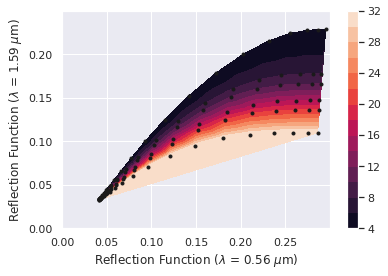

In [322]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
plt.plot(x,y,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi, yi, np.exp(zi), levels=14)

plt.colorbar(cntr1)
plt.show()

In [323]:
xi_test = np.array([0.25])
yi_test = np.array([0.15])

zi_test = griddata((x,y),z,(xi_test,yi_test),method='linear')
print(np.exp(zi_test))

[14.54682562]


### Optical depth interpolation

In [327]:
df_cloud_atm

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
0.125000,0.041789,0.041461,0.041488,0.041451,0.041419,0.041366,0.034079,0.033589,0.033398,0.033117,0.033077,0.032937
0.176777,0.042479,0.042024,0.042055,0.041990,0.041954,0.041877,0.034951,0.034263,0.034002,0.033588,0.033532,0.033331
0.250000,0.043450,0.042816,0.042851,0.042757,0.042704,0.042598,0.036171,0.035207,0.034841,0.034265,0.034182,0.033885
0.353553,0.044803,0.043916,0.043969,0.043830,0.043750,0.043607,0.037887,0.036536,0.036036,0.035220,0.035082,0.034664
0.500000,0.046706,0.045484,0.045528,0.045325,0.045211,0.045011,0.040304,0.038381,0.037704,0.036563,0.036349,0.035739
0.707107,0.049367,0.047695,0.047720,0.047413,0.047246,0.046957,0.043716,0.040992,0.040068,0.038477,0.038126,0.037219
1.000000,0.053126,0.050829,0.050792,0.050325,0.050095,0.049679,0.048568,0.044645,0.043419,0.041166,0.040618,0.039290
1.414214,0.058442,0.055310,0.055142,0.054417,0.054091,0.053516,0.055583,0.049818,0.048165,0.045025,0.044149,0.042162
2.000000,0.066103,0.061775,0.061409,0.060296,0.059830,0.059018,0.065739,0.057213,0.054974,0.050583,0.049219,0.046221


In [328]:
df_numpy = df_cloud_atm.to_numpy()

In [337]:
x = df_numpy[0][0:N_cloud_atm]
for i in range(N_dTau_cloud-1):
    x = np.concatenate([x, df_numpy[i+1][0:N_cloud_atm]])

y = df_numpy[0][N_cloud_atm:2*N_cloud_atm]
for i in range(N_dTau_cloud-1):
    y = np.concatenate([y, df_numpy[i+1][N_cloud_atm:2*N_cloud_atm]])

In [339]:
len(x)

120

In [340]:
len(y)

120

In [343]:
df_cloud_atm.index[0]

0.125

In [346]:
z = np.ones(N_cloud_atm)*df_cloud_atm.index[0]
for i in range(N_dTau_cloud-1):
    z = np.concatenate([z, np.ones(N_cloud_atm)*df_cloud_atm.index[i+1]])

In [348]:
len(z)

120

In [349]:
z = np.log(z)

In [350]:
xi = np.arange(0,0.3,0.0001)
yi = np.arange(0,0.25,0.0001)
xi,yi = np.meshgrid(xi,yi)

In [351]:
zi = griddata((x,y),z,(xi,yi),method='linear')

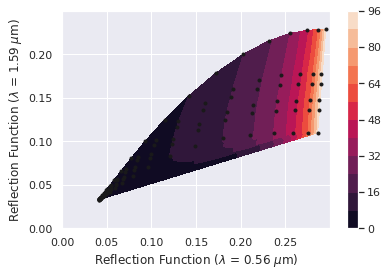

In [352]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
plt.plot(x,y,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
cntr1 = ax.contourf(xi, yi, np.exp(zi), levels=14)

plt.colorbar(cntr1)
plt.show()

In [353]:
xi_test = np.array([0.25])
yi_test = np.array([0.15])

zi_test = griddata((x,y),z,(xi_test,yi_test),method='linear')
print(np.exp(zi_test))

[36.89489265]


### Testing the strength of the Effective Radius interpolation

In [364]:
x = df2_numpy[0]
for i in range(N_cloud_atm-1):
    if i != 1:
        x = np.concatenate([x, df2_numpy[i+1]])

y = df2_numpy[N_cloud_atm]
for i in range(N_cloud_atm-1):
    if i != 1:
        y = np.concatenate([y, df2_numpy[i+1+N_cloud_atm]])

In [365]:
# x = np.concatenate([df2_numpy[4], df2_numpy[5], df2_numpy[6], df2_numpy[7], df2_numpy[8], df2_numpy[9]])
# y = np.concatenate([df2_numpy[4+N_cloud_atm], df2_numpy[5+N_cloud_atm], df2_numpy[6+N_cloud_atm], df2_numpy[7+N_cloud_atm], df2_numpy[8+N_cloud_atm], df2_numpy[9+N_cloud_atm]])
# # print(x)
# # print(y)

In [366]:
z = np.concatenate([np.ones(N_dTau_cloud)*4, np.ones(N_dTau_cloud)*8, np.ones(N_dTau_cloud)*16, np.ones(N_dTau_cloud)*20, np.ones(N_dTau_cloud)*32])

In [367]:
z = np.log(z)

In [368]:
# z

In [369]:
xi = np.arange(0,0.3,0.0001)
yi = np.arange(0,0.25,0.0001)
xi,yi = np.meshgrid(xi,yi)

In [370]:
zi = griddata((x,y),z,(xi,yi),method='linear')

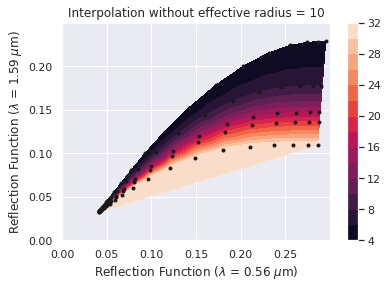

In [398]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.contourf(xi,yi,zi) # np.arange(0.18,0.2,0.001)
plt.plot(x,y,'k.')
plt.xlabel('Reflection Function ($\lambda$ = 0.56 $\mu$m)')
plt.ylabel('Reflection Function ($\lambda$ = 1.59 $\mu$m)')
plt.title('Interpolation without effective radius = 10')
cntr1 = ax.contourf(xi, yi, np.exp(zi), levels=14)

plt.colorbar(cntr1)
plt.show()

In [372]:
xi_test = np.array([0.25])
yi_test = np.array([0.15])

zi_test = griddata((x,y),z,(xi_test,yi_test),method='linear')
print(np.exp(zi_test))

[14.6604561]


In [389]:
xi_test = df2_numpy[2]
yi_test = df2_numpy[2+N_cloud_atm]
zi_test = griddata((x,y),z,(xi_test,yi_test),method='linear')
print(np.exp(zi_test))
percentage_error = np.abs((np.exp(zi_test)-10)*10)
print(percentage_error)

[11.40690288 11.26527855 11.2251125  11.19774877 11.01853072 10.89475435
 10.64463419 10.44514022 10.28834345 10.13648026 10.08673395 10.08785322
 10.13185515 10.20000406 10.27891201 10.34611282 10.39155657 10.41277263
 10.41838307 10.41757923]
[14.06902885 12.65278545 12.25112499 11.97748771 10.1853072   8.94754348
  6.44634189  4.45140219  2.88343452  1.36480262  0.86733949  0.87853216
  1.31855151  2.00004063  2.7891201   3.46112819  3.91556568  4.12772626
  4.18383075  4.17579234]


Text(0.5, 1.0, 'Percentage Error of Interpolation for Effective Radius = 10')

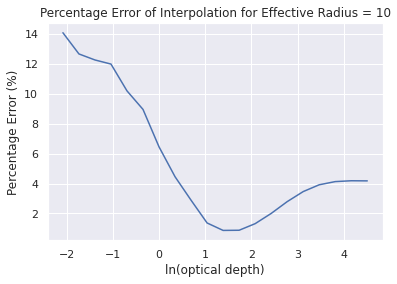

In [397]:
plt.plot(df_index_log, percentage_error)
plt.xlabel('ln(optical depth)')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error of Interpolation for Effective Radius = 10')